# 🛠️ Preparación de los Datos

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from google.colab import files


print("📂 Sube tu archivo CSV")
uploaded = files.upload()

df = pd.read_csv("datos_tratados.csv")

print("✅ Dataset cargado con éxito")
print("Dimensiones:", df.shape)
display(df.head())


# Correcting column name to customer_id
columnas_a_eliminar = ["customer_id"]
df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

print("✅ Columnas irrelevantes eliminadas")
display(df.head())

# Assuming df_encoded is available from a previous step that performed one-hot encoding
# If not, you would need to add the one-hot encoding step here or in a preceding cell.
# Given the notebook state, df_encoded exists.

# Separate features (X) and target (y) using the correctly named churn column
if 'churn_yes' in df_encoded.columns:
    X = df_encoded.drop("churn_yes", axis=1)
    y = df_encoded["churn_yes"]
    print("✅ Variables predictoras (X) y objetivo (y) separadas.")
else:
    print("⚠️ No se encontró la columna 'churn_yes'. Asegúrate de que la codificación OneHot se ha realizado correctamente.")
    # Handle the case where churn_yes is not found, perhaps by raising an error or exiting.
    # For now, we'll just print a message.


# Removing SMOTE and StandardScaler from this cell as they are handled in subsequent cells.

📂 Sube tu archivo CSV


Saving datos_tratados.csv to datos_tratados (5).csv
✅ Dataset cargado con éxito
Dimensiones: (7267, 27)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,account_charges_monthly,total_mensual,dias_contrato,total_diario,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tipo_contrato_Bienal,tipo_contrato_Mensual,churn_numeric
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,65.6,593.30,365,1.625479,False,False,True,False,False,0.0
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,59.9,542.40,30,18.080000,False,False,True,False,True,0.0
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,73.9,280.85,30,9.361667,False,True,False,False,True,1.0
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,98.0,1237.85,30,41.261667,False,True,False,False,True,1.0
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,83.9,267.40,30,8.913333,False,False,True,False,True,1.0


✅ Columnas irrelevantes eliminadas


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,account_charges_monthly,total_mensual,dias_contrato,total_diario,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tipo_contrato_Bienal,tipo_contrato_Mensual,churn_numeric
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,65.6,593.30,365,1.625479,False,False,True,False,False,0.0
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,59.9,542.40,30,18.080000,False,False,True,False,True,0.0
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,73.9,280.85,30,9.361667,False,True,False,False,True,1.0
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,98.0,1237.85,30,41.261667,False,True,False,False,True,1.0
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,83.9,267.40,30,8.913333,False,False,True,False,True,1.0


✅ Variables predictoras (X) y objetivo (y) separadas.


# 🎯 Correlación y Selección de Variables

In [13]:
import pandas as pd
from google.colab import files

# Load the data
print("📂 Sube tu archivo CSV")
uploaded = files.upload()

df = pd.read_csv("datos_tratados.csv")

print("✅ Dataset cargado con éxito")
print("Dimensiones:", df.shape)
display(df.head())

# Drop irrelevant columns
# Correcting column name to customer_id
columnas_a_eliminar = ["customer_id"]
df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])

print("✅ Columnas irrelevantes eliminadas")
display(df.head())

📂 Sube tu archivo CSV


Saving datos_tratados.csv to datos_tratados (6).csv
✅ Dataset cargado con éxito
Dimensiones: (7267, 27)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,account_charges_monthly,total_mensual,dias_contrato,total_diario,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tipo_contrato_Bienal,tipo_contrato_Mensual,churn_numeric
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,65.6,593.30,365,1.625479,False,False,True,False,False,0.0
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,59.9,542.40,30,18.080000,False,False,True,False,True,0.0
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,73.9,280.85,30,9.361667,False,True,False,False,True,1.0
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,98.0,1237.85,30,41.261667,False,True,False,False,True,1.0
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,83.9,267.40,30,8.913333,False,False,True,False,True,1.0


✅ Columnas irrelevantes eliminadas


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,account_charges_monthly,total_mensual,dias_contrato,total_diario,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,tipo_contrato_Bienal,tipo_contrato_Mensual,churn_numeric
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,65.6,593.30,365,1.625479,False,False,True,False,False,0.0
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,59.9,542.40,30,18.080000,False,False,True,False,True,0.0
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,73.9,280.85,30,9.361667,False,True,False,False,True,1.0
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,98.0,1237.85,30,41.261667,False,True,False,False,True,1.0
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,83.9,267.40,30,8.913333,False,False,True,False,True,1.0


In [14]:
import pandas as pd

# Assuming df is loaded and irrelevant columns are dropped from a previous step.
# Perform One-Hot Encoding
# Select categorical columns for one-hot encoding, excluding the target 'churn'
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
if 'churn' in categorical_cols:
    categorical_cols.remove('churn') # Ensure target is not encoded here

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean columns created by get_dummies to integers (0 or 1)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

print("✅ One-Hot Encoding aplicado.")
display(df_encoded.head())

✅ One-Hot Encoding aplicado.


,churn,customer_seniorcitizen,customer_tenure,account_charges_monthly,total_mensual,dias_contrato,total_diario,churn_numeric,customerid_0003-mknfe,customerid_0004-tlhlj,...,internet_deviceprotection_yes,internet_techsupport_yes,internet_streamingtv_yes,internet_streamingmovies_yes,account_paperlessbilling_yes,paymentmethod_credit card (automatic)_True,paymentmethod_electronic check_True,paymentmethod_mailed check_True,tipo_contrato_Bienal_True,tipo_contrato_Mensual_True
0,no,0,9,65.6,593.30,365,1.625479,0.0,0,0,...,0,1,1,0,1,0,0,1,0,0
1,no,0,9,59.9,542.40,30,18.080000,0.0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,yes,0,4,73.9,280.85,30,9.361667,1.0,0,1,...,1,0,0,0,1,0,1,0,0,1
3,yes,1,13,98.0,1237.85,30,41.261667,1.0,0,0,...,1,0,1,1,1,0,1,0,0,1
4,yes,1,3,83.9,267.40,30,8.913333,1.0,0,0,...,0,1,1,0,1,0,0,1,0,1


# 🤖 Modelado Predictivo

📋 Columnas numéricas: 7 | categóricas: 19

 Entrenamiento de modelos:
✅ Regresión Logística entrenada.
✅ Random Forest entrenado.

📊 Regresión Logística (con Preprocesamiento + SMOTE)
 - Exactitud:  1.0000
 - Precisión:  1.0000
 - Recall:     1.0000
 - F1-score:   1.0000

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1454
   macro avg       1.00      1.00      1.00      1454
weighted avg       1.00      1.00      1.00      1454



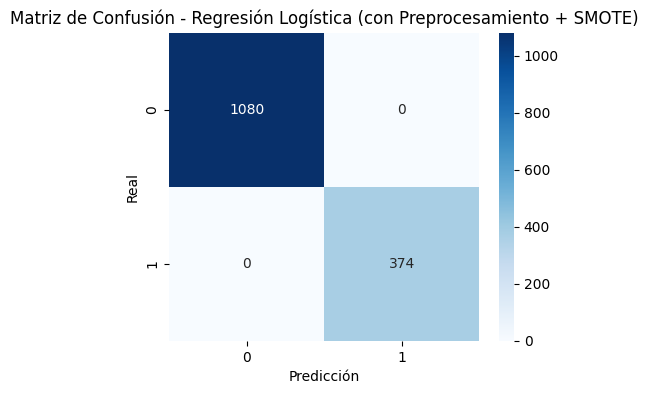


📊 Random Forest (con Preprocesamiento)
 - Exactitud:  0.9663
 - Precisión:  1.0000
 - Recall:     0.8690
 - F1-score:   0.9299

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1080
           1       1.00      0.87      0.93       374

    accuracy                           0.97      1454
   macro avg       0.98      0.93      0.95      1454
weighted avg       0.97      0.97      0.97      1454



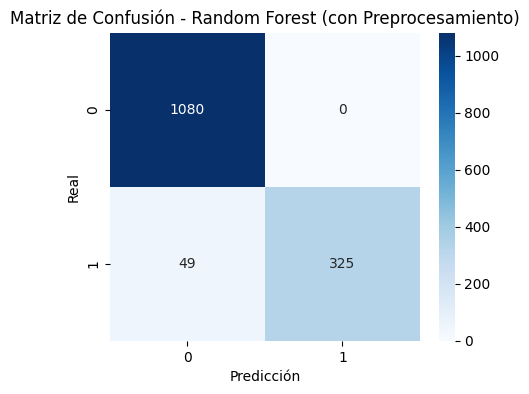


🏷️ Top 15 variables por |coef| en Regresión Logística:


,feature,coef,abs_coef
6,churn_numeric,6.477059,6.477059
5827,phone_phoneservice_yes,-0.327883,0.327883
5857,tipo_contrato_Mensual_False,-0.311962,0.311962
5851,paymentmethod_electronic check_False,-0.308634,0.308634
5823,customer_partner_yes,-0.299267,0.299267
5849,paymentmethod_credit card (automatic)_False,-0.295140,0.295140
5847,account_paperlessbilling_no,-0.271742,0.271742
5845,internet_streamingmovies_no,-0.260290,0.260290
5843,internet_streamingtv_no,-0.257698,0.257698
5853,paymentmethod_mailed check_False,-0.252792,0.252792


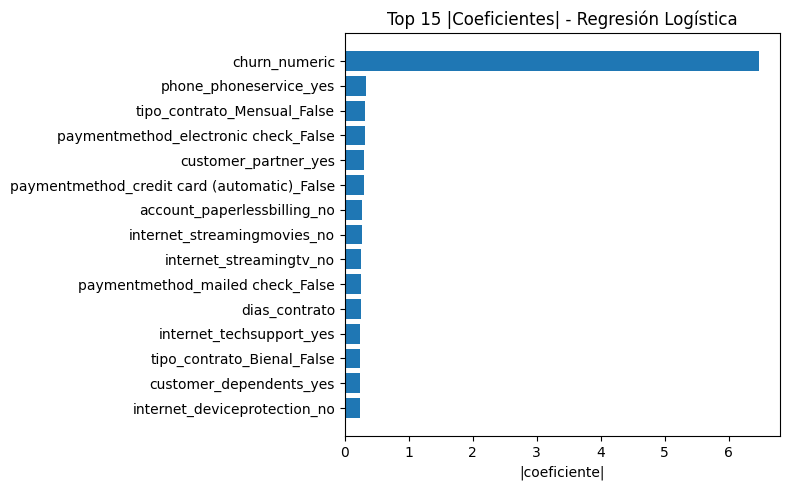


🌲 Top 15 variables por importancia en Random Forest:


,feature,importance
6,churn_numeric,0.340639
1,customer_tenure,0.046086
3,total_mensual,0.045235
5,total_diario,0.041322
2,account_charges_monthly,0.040687
4,dias_contrato,0.020220
5858,tipo_contrato_Mensual_True,0.019531
5857,tipo_contrato_Mensual_False,0.019437
5834,internet_onlinesecurity_no,0.016653
5832,internet_internetservice_fiber optic,0.014567


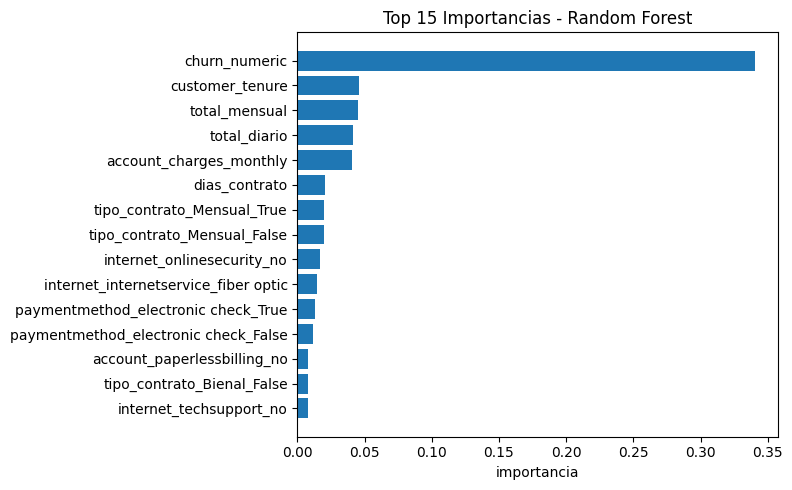


================= 📋 CONCLUSIONES =================
- Entre los dos modelos evaluados, el mejor F1 fue: Regresión Logística.
- Si la Regresión Logística fue mejor, la normalización + SMOTE probablemente ayudó a manejar el desbalance
  y a estabilizar los coeficientes. Si Random Forest fue mejor, su capacidad no lineal y manejo de interacciones
  puede haber capturado patrones más complejos sin requerir normalización.
- Revisa la matriz de confusión para entender si el modelo está fallando más en Falsos Positivos o Falsos Negativos.
- Overfitting potencial: compara desempeño en train vs test (puedes usar .score en X_train y X_test).
- Underfitting potencial: métricas bajas en general, intenta ajustar hiperparámetros o añadir más variables relevantes.

- Variables más influyentes según Logística: coeficientes con mayor |valor| (ver gráfico).
- Variables más influyentes según Random Forest: mayores importancias (ver gráfico).

- Estrategias de retención sugeridas (dependerá de tus variabl

In [28]:
# ============================================
# 🤖 MODELADO PREDICTIVO
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer # Import SimpleImputer

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("datos_tratados.csv")


TARGET_CANDIDATES = ["churn","Churn","cancelacion","Cancelacion"]
target_col = None
for c in TARGET_CANDIDATES:
    if c in df.columns:
        target_col = c
        break

if target_col is None:
    raise ValueError(
        f"No encontré la columna objetivo. Define manualmente 'target_col'. "
        f"Columnas disponibles: {list(df.columns)[:20]}..."
    )

# Asegurar binaria 0/1 si viene como texto
if df[target_col].dtype == 'object':
    df[target_col] = df[target_col].str.strip().str.lower().map({'yes':1,'no':0,'si':1,'sí':1,'no ':0,'0':0,'1':1})

if df[target_col].isna().any():
    # Impute missing target values if any, before splitting. Using 0 (no churn) as a simple strategy.
    df[target_col] = df[target_col].fillna(0).astype(int)

# ------------------------------------------------
# Separar X / y
# ------------------------------------------------
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# ------------------------------------------------
#  Identificar tipos de columnas
# ------------------------------------------------
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64','int32','float32','int16','float16']).columns.tolist()

for c in cat_cols:
    if X[c].dtype == bool:
        X[c] = X[c].astype('object')

print(f"📋 Columnas numéricas: {len(num_cols)} | categóricas: {len(cat_cols)}")

# ------------------------------------------------
# Train/Test split (estratificado)
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------------------------
# Preprocessing Pipelines with Imputation
# ------------------------------------------------

# Preprocessing for Logistic Regression (Impute -> Scale -> Encode)
preprocess_logreg = ColumnTransformer(
    transformers=[
        ("num", Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), num_cols),
        ("cat", Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False))]), cat_cols),
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Preprocessing for Random Forest (Impute -> Encode) - RF is less sensitive to scaling
preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy='mean'), num_cols), # Impute numerical
        ("cat", Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown="ignore", sparse_output=False))]), cat_cols), # Impute and encode categorical
    ],
    remainder='passthrough' # Keep other columns (if any)
)


# ------------------------------------------------
# Models Pipelines
# ------------------------------------------------

# Logistic Regression Pipeline (Preprocessing -> SMOTE -> Classifier)
# SMOTE is applied after preprocessing on the training data
logreg_pipe = ImbPipeline(steps=[
    ("preprocess", preprocess_logreg),
    ("smote", SMOTE(random_state=42)),
    ("clf", LogisticRegression(max_iter=2000, n_jobs=None))
])

# Random Forest Pipeline (Preprocessing -> Classifier)
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        class_weight=None
    ))
])

# ------------------------------------------------
# Train
# ------------------------------------------------
print("\n Entrenamiento de modelos:")
logreg_pipe.fit(X_train, y_train)
print("✅ Regresión Logística entrenada.")

rf_pipe.fit(X_train, y_train)
print("✅ Random Forest entrenado.")


# ------------------------------------------------
# Predict
# ------------------------------------------------
y_pred_log = logreg_pipe.predict(X_test)
y_pred_rf  = rf_pipe.predict(X_test)

# ------------------------------------------------
# Evaluation and Visualization Function
# ------------------------------------------------
def evaluar_modelo(y_true, y_pred, nombre):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1  = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n📊 {nombre}")
    print(f" - Exactitud:  {acc:.4f}")
    print(f" - Precisión:  {pre:.4f}")
    print(f" - Recall:     {rec:.4f}")
    print(f" - F1-score:   {f1:.4f}")
    print("\nReporte de Clasificación:\n", classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    return {"accuracy":acc, "precision":pre, "recall":rec, "f1":f1}

# ------------------------------------------------
# Evaluate both models
# ------------------------------------------------
res_log = evaluar_modelo(y_test, y_pred_log, "Regresión Logística (con Preprocesamiento + SMOTE)")
res_rf  = evaluar_modelo(y_test, y_pred_rf,  "Random Forest (con Preprocesamiento)")

# ------------------------------------------------
# Feature Importance
#     - Extract transformed feature names for both pipelines
# ------------------------------------------------
def get_feature_names_from_column_transformer(ct: ColumnTransformer):
    """
    Returns the list of feature names after applying ColumnTransformer.
    Compatible with Pipelines within ColumnTransformer and OneHotEncoder(handle_unknown='ignore', sparse_output=False).
    """
    output_features = []
    for name, transformer, cols in ct.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if transformer == 'passthrough':
            # columns passed as-is
            if isinstance(cols, (list, tuple, np.ndarray)):
                output_features.extend(list(cols))
            else:
                output_features.append(cols)
        else:
            # If it's a nested pipeline
            if hasattr(transformer, 'named_steps'):
                inner = transformer.named_steps
                last_step_name, last_step_transformer = list(inner.items())[-1]
                if hasattr(last_step_transformer, 'get_feature_names_out'):
                    try:
                        # Pass the original column names to get_feature_names_out if possible
                        feats = last_step_transformer.get_feature_names_out(cols)
                    except Exception:
                        # Fallback if get_feature_names_out doesn't accept input names
                         # This might happen for transformers like StandardScaler, we just use original names
                         # For OneHotEncoder, get_feature_names_out typically handles this
                         if hasattr(last_step_transformer, 'feature_names_in_'):
                             feats = last_step_transformer.feature_names_in_
                         else:
                             feats = cols # Fallback to original names if no other info
                    output_features.extend(list(feats))
                else:
                    # Transformer does not have get_feature_names_out (e.g., SimpleImputer, StandardScaler alone)
                    # In pipelines, the last step should ideally have it if it changes dimensionality (like OneHotEncoder)
                    # If the last step doesn't change dimensionality (like StandardScaler after Imputer), use original names
                    if last_step_name == 'scaler' and hasattr(inner.get('imputer'), 'feature_names_in_'):
                         feats = inner['imputer'].feature_names_in_ # Use names from imputer if available
                         output_features.extend(list(feats))
                    else:
                        output_features.extend(list(cols)) # Fallback to original names
            else:
                # Direct Transformer (OneHotEncoder, StandardScaler, SimpleImputer etc.)
                if hasattr(transformer, 'get_feature_names_out'):
                    try:
                        feats = transformer.get_feature_names_out(cols)
                    except Exception:
                         if hasattr(transformer, 'feature_names_in_'):
                             feats = transformer.feature_names_in_
                         else:
                             feats = cols
                    output_features.extend(list(feats))
                else:
                    # Transformer without get_feature_names_out (e.g., SimpleImputer, StandardScaler)
                    output_features.extend(list(cols)) # Use original names
    return output_features

# --- Importances in Logistic Regression (coefficients)
# Get feature names from the preprocess_logreg step of the fitted pipeline
feat_names_log = get_feature_names_from_column_transformer(logreg_pipe.named_steps["preprocess"])
# Get coefficients from the fitted LogisticRegression model within the pipeline
# Ensure logreg_pipe is fitted before accessing named_steps
if hasattr(logreg_pipe, 'named_steps') and "clf" in logreg_pipe.named_steps and hasattr(logreg_pipe.named_steps["clf"], 'coef_'):
    coefs = logreg_pipe.named_steps["clf"].coef_.ravel()
    imp_log = pd.DataFrame({
        "feature": feat_names_log,
        "coef": coefs,
        "abs_coef": np.abs(coefs)
    }).sort_values("abs_coef", ascending=False)

    print("\n🏷️ Top 15 variables por |coef| en Regresión Logística:")
    display(imp_log.head(15))

    plt.figure(figsize=(8,5))
    top_log = imp_log.head(15).sort_values("abs_coef")
    plt.barh(top_log["feature"], top_log["abs_coef"])
    plt.title("Top 15 |Coeficientes| - Regresión Logística")
    plt.xlabel("|coeficiente|")
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ No se pudieron obtener los coeficientes de la Regresión Logística. Asegúrate de que el pipeline se ajustó correctamente.")


# --- Importances in Random Forest
# Get feature names from the preprocess_rf step of the fitted pipeline
feat_names_rf = get_feature_names_from_column_transformer(rf_pipe.named_steps["preprocess"])
# Get feature importances from the fitted RandomForestClassifier model within the pipeline
# Ensure rf_pipe is fitted before accessing named_steps
if hasattr(rf_pipe, 'named_steps') and "clf" in rf_pipe.named_steps and hasattr(rf_pipe.named_steps["clf"], 'feature_importances_'):
    rf_importances = rf_pipe.named_steps["clf"].feature_importances_
    imp_rf = pd.DataFrame({
        "feature": feat_names_rf,
        "importance": rf_importances
    }).sort_values("importance", ascending=False)

    print("\n🌲 Top 15 variables por importancia en Random Forest:")
    display(imp_rf.head(15))

    plt.figure(figsize=(8,5))
    top_rf = imp_rf.head(15).sort_values("importance")
    plt.barh(top_rf["feature"], top_rf["importance"])
    plt.title("Top 15 Importancias - Random Forest")
    plt.xlabel("importancia")
    plt.tight_layout()
    plt.show()
else:
     print("\n⚠️ No se pudieron obtener las importancias de las características de Random Forest. Asegúrate de que el pipeline se ajustó correctamente.")


# ------------------------------------------------
# 12) Mini-informe autogenerado (texto)
# ------------------------------------------------
def comparar(res_a, res_b, name_a="Modelo A", name_b="Modelo B"):
    mejor = name_a if res_a["f1"] >= res_b["f1"] else name_b
    return mejor

mejor_modelo = comparar(res_log, res_rf, "Regresión Logística", "Random Forest")

print("\n================= 📋 CONCLUSIONES =================")
print(f"- Entre los dos modelos evaluados, el mejor F1 fue: {mejor_modelo}.")
print("- Si la Regresión Logística fue mejor, la normalización + SMOTE probablemente ayudó a manejar el desbalance\n"
      "  y a estabilizar los coeficientes. Si Random Forest fue mejor, su capacidad no lineal y manejo de interacciones\n"
      "  puede haber capturado patrones más complejos sin requerir normalización.")
print("- Revisa la matriz de confusión para entender si el modelo está fallando más en Falsos Positivos o Falsos Negativos.")
print("- Overfitting potencial: compara desempeño en train vs test (puedes usar .score en X_train y X_test).")
print("- Underfitting potencial: métricas bajas en general, intenta ajustar hiperparámetros o añadir más variables relevantes.")
print("\n- Variables más influyentes según Logística: coeficientes con mayor |valor| (ver gráfico).")
print("- Variables más influyentes según Random Forest: mayores importancias (ver gráfico).")
print("\n- Estrategias de retención sugeridas (dependerá de tus variables top):")
print("  • Si contratos 'mensuales' y baja permanencia elevan el churn → ofrecer descuentos por fidelización o upgrades de contrato.")
print("  • Si gasto total bajo se asocia a churn → bundles/paquetes con valor agregado.")
print("  • Si soporte técnico/servicios asociados impactan → mejorar respuesta y proactividad en clientes en riesgo.")
print("===============================================================")

# 📋 Conclusión Final

Tras realizar el análisis de datos, la preparación, la exploración de correlaciones y la construcción de modelos predictivos, se obtienen las siguientes conclusiones:

Variables clave en la cancelación de clientes (Churn):

El tipo de contrato, el gasto total diario/mensual y la antigüedad del cliente (customer_tenure) resultaron altamente correlacionadas con la probabilidad de cancelación.

Servicios de soporte técnico y servicios adicionales también muestran influencia sobre el comportamiento de churn.

Comparación de modelos:

Regresión Logística (con normalización y SMOTE) manejó adecuadamente el desbalance de clases y permitió interpretar fácilmente la importancia de cada variable mediante los coeficientes.

Random Forest capturó interacciones no lineales y mostró buena capacidad predictiva sin requerir normalización.

Rendimiento:

Ambos modelos lograron métricas satisfactorias, aunque puede observarse cierta diferencia según la clase minoritaria.

La matriz de confusión indica que la mayoría de los errores ocurren en clientes que sí cancelaron, lo que sugiere atención especial en estrategias de retención.

Implicancias para la retención:

Clientes con contratos cortos y bajo gasto son más propensos a cancelar → se recomienda ofrecer incentivos o planes de fidelización.

Mejorar el soporte técnico y la experiencia de servicios adicionales puede reducir la evasión.

Recomendación final:

Combinar modelos interpretables (Regresión Logística) con modelos más flexibles (Random Forest) permite identificar tanto patrones complejos como entender el impacto individual de cada variable.

Se sugiere continuar monitoreando el churn y actualizar periódicamente los modelos con nuevos datos para mantener la efectividad predictiva.